In [1]:
import pandas as pd
import numpy as np


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
#from skelarn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [4]:
from sklearn.naive_bayes import MultinomialNB

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/AiDevNepal/ai-saturdays-workshop-8/master/data/spam.csv')

In [6]:
data

,text,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [8]:
remplazar={
    'spam':1,
    'ham':0
}
data=data.replace({'target':remplazar})

/tmp/ipython-input-8-1017074710.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({'target':remplazar})


In [9]:
data

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [10]:
data["target"].value_counts()

,count
target,
0,4825
1,747


In [11]:
X=data["text"]
y=data["target"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [15]:
x_train

,text
860,In work now. Going have in few min.
1436,I jus hope its true that missin me cos i'm re...
1921,No current and food here. I am alone also
4458,Welcome to UK-mobile-date this msg is FREE giv...
4476,Oh :-)only 4 outside players allowed to play know
...,...
4237,Lol wtf random. Btw is that your lunch break
4431,Dont think you need yellow card for uk travel....
4266,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
2637,No I don't have cancer. Moms making a big deal...


In [18]:
vectorizer = CountVectorizer(ngram_range=(1,2))

In [19]:
vectorizer.fit(x_train)

CountVectorizer(ngram_range=(1, 2))

In [20]:
x_trainVector=vectorizer.transform(x_train)

In [22]:
print(x_trainVector)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 109801 stored elements and shape (4179, 40568)>
  Coords	Values
  (0, 11734)	1
  (0, 11743)	1
  (0, 13743)	1
  (0, 13756)	1
  (0, 14931)	1
  (0, 14997)	1
  (0, 16820)	2
  (0, 16910)	1
  (0, 17098)	1
  (0, 21497)	1
  (0, 23828)	1
  (0, 23895)	1
  (0, 38919)	1
  (0, 38946)	1
  (1, 1724)	1
  (1, 1788)	1
  (1, 3459)	1
  (1, 3491)	1
  (1, 8367)	1
  (1, 8397)	1
  (1, 10100)	1
  (1, 10105)	1
  (1, 11644)	1
  (1, 11654)	1
  (1, 14476)	1
  :	:
  (4178, 7495)	1
  (4178, 7499)	1
  (4178, 13977)	1
  (4178, 14073)	1
  (4178, 22228)	1
  (4178, 22489)	1
  (4178, 22530)	1
  (4178, 24002)	1
  (4178, 24003)	1
  (4178, 25222)	1
  (4178, 25321)	1
  (4178, 27238)	1
  (4178, 27249)	1
  (4178, 28206)	1
  (4178, 28231)	1
  (4178, 30682)	1
  (4178, 30726)	1
  (4178, 30905)	1
  (4178, 30914)	1
  (4178, 34166)	1
  (4178, 34170)	1
  (4178, 34433)	1
  (4178, 34812)	1
  (4178, 37096)	1
  (4178, 37158)	1


In [24]:
modelo=MultinomialNB(alpha=0.1)

In [25]:
modelo=modelo.fit(x_trainVector,y_train)

In [27]:
yprediTest=modelo.predict(vectorizer.transform(x_test))

In [29]:
mx=confusion_matrix(y_test,yprediTest)
mx

array([[1194,   10],
       [  14,  175]])

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

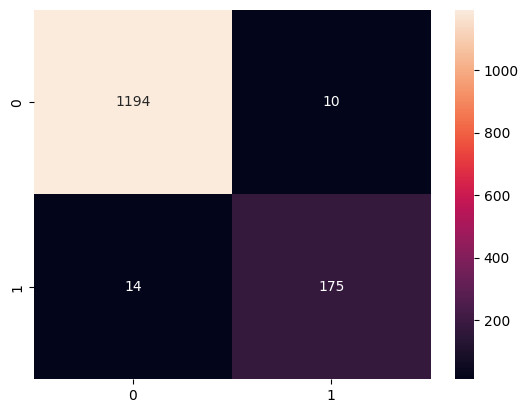

In [31]:
sns.heatmap(mx,annot=True,fmt='g')

In [32]:
print(classification_report(y_test,yprediTest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1204
           1       0.95      0.93      0.94       189

    accuracy                           0.98      1393
   macro avg       0.97      0.96      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [33]:
from sklearn.metrics import accuracy_score,RocCurveDisplay,roc_auc_score

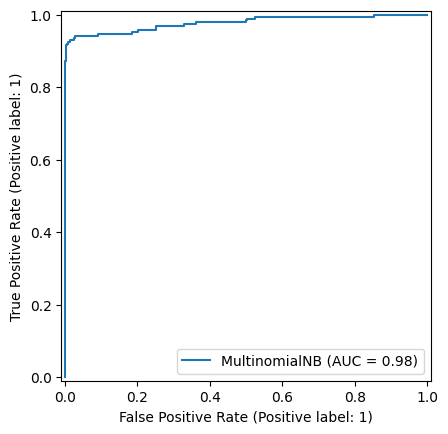

In [34]:
displayroc=RocCurveDisplay.from_estimator(modelo,vectorizer.transform(x_test),y_test)

In [37]:
modelo.predict(vectorizer.transform( [
 "Thank you, ABC. Can you also share your LinkedIn profile? As you are a good at programming at pyhthon, would be willing to see your personal/college projects.",
 "Hi y’all, We have a Job Openings in the positions of software engineer, IT officer at ABC Company.Kindly, send us your resume and the cover letter as soon as possible if you think you are an eligible candidate and meet the criteria.",
 "Dear ABC, Congratulations! You have been selected as a SOftware Developer at XYZ Company. We were really happy to see your enthusiasm for this vision and mission. We are impressed with your background and we think you would make an excellent addition to the team.",
 ]))


array([0, 0, 0])

In [39]:
modelo.predict(vectorizer.transform(
 [
 "congratulations, you became today's lucky winner",
 "1-month unlimited calls offer Activate now",
 "Ram wants your phone number",
]))


array([1, 1, 0])